Loading the IMDB dataset

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_labels[0]

1

In [ ]:
max([max(sequence) for sequence in train_data])

9999

Decoding reviews to text

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Preparing the data

Encoding the integer sequences via multi-hot encoding

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building the model different configurations

0. Model given by professor - Base point (model)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

1. (Question 1) Building the model with 1 hidden layer (model_1_HL)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model_1_HL = keras.Sequential([
    layers.Dense(16, activation="relu"), # Building the model with 1 hidden layer
    layers.Dense(1, activation="sigmoid")
])

model_1_HL.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

2. (Question 1) Building the model with 3 hidden layer (model_3_hl)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model_3_HL = keras.Sequential([
    layers.Dense(16, activation="relu"), # hidden layer 1
    layers.Dense(16, activation="relu"), # hidden layer 2
    layers.Dense(16, activation="relu"), # hidden layer 3
    layers.Dense(1, activation="sigmoid")
])

model_3_HL.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

3. (Question 2) Building the model with fewer hidden units 32 (model_32_HU)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model_32_HU = keras.Sequential([
    layers.Dense(32, activation="relu"), # hidden units 32
    layers.Dense(32, activation="relu"), # hidden units 32
    layers.Dense(1, activation="sigmoid")
    ])

model_32_HU.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

4. (Question 2) Building the model with higher hidden units 64 (model64_HU)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model_64_HU = keras.Sequential([
    layers.Dense(64, activation="relu"), # hidden units 64
    layers.Dense(64, activation="relu"), # hidden units 64
    layers.Dense(1, activation="sigmoid")
    ])

model_64_HU.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

5. (Question 3) Building the base model with mse loss function (model_mse)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model_mse = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_mse.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])


6. (Question 4) Building the model with tanh activation

In [ ]:
model_tanh = keras.Sequential([
    layers.Dense(16, activation="tanh"), # tanh activation
    layers.Dense(16, activation="tanh"), # tanh activation
    layers.Dense(1, activation="sigmoid")
])

model_tanh.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

7. (Question 5) Building the model with regularization (model_reg)

In [ ]:
from tensorflow.keras import regularizers

model_reg = keras.Sequential([
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.001)), # Applied L2 regularization (0.001 - common accepted value)
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.001)), # Applied L2 regularization (0.001 - common accepted value)
    layers.Dense(1, activation="sigmoid")
])

model_reg.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

8. (Question 5) Building the model with dropout (model_drp)

In [ ]:
model_drp = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

model_drp.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

Creating a validation set

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### Training your model

### 0. Base model

In [ ]:
Base_model = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.6956 - loss: 0.6023 - val_accuracy: 0.8656 - val_loss: 0.4013
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.8949 - loss: 0.3472 - val_accuracy: 0.8802 - val_loss: 0.3176
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.9216 - loss: 0.2514 - val_accuracy: 0.8911 - val_loss: 0.2818
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9353 - loss: 0.1987 - val_accuracy: 0.8897 - val_loss: 0.2744
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9477 - loss: 0.1634 - val_accuracy: 0.8854 - val_loss: 0.2807
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9574 - loss: 0.1372 - val_accuracy: 0.8871 - val_loss: 0.2828
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9652 - loss: 0.1178 - val_accuracy: 0.8852 - val_loss: 0.2937
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9738 - loss: 0.0975 - val_accuracy: 0.8703 - v

In [ ]:
Base_model_dict = Base_model.history
Base_model_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Plotting the graphshowing training and validation loss

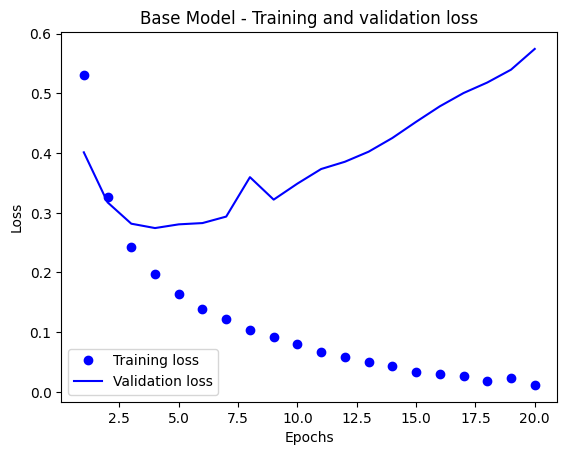

In [ ]:
import matplotlib.pyplot as plt
Base_model_dict = Base_model.history
loss_values_0 = Base_model_dict["loss"]
val_loss_values_0 = Base_model_dict["val_loss"]
epochs = range(1, len(loss_values_0) + 1)
plt.plot(epochs, loss_values_0, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_0, "b", label="Validation loss")
plt.title("Base Model - Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting Accuracy

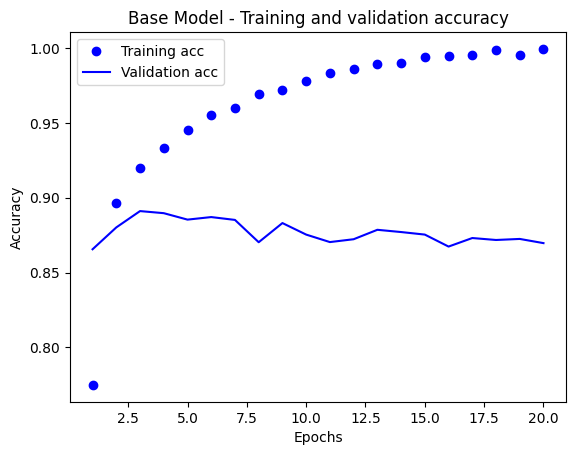

In [ ]:
plt.clf()
acc_0 = Base_model_dict["accuracy"]
val_acc_0 = Base_model_dict["val_accuracy"]
plt.plot(epochs, acc_0, "bo", label="Training acc")
plt.plot(epochs, val_acc_0, "b", label="Validation acc")
plt.title("Base Model - Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
Base_model_results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.7307 - loss: 0.5955
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.8918 - loss: 0.3226
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9185 - loss: 0.2375
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9257 - loss: 0.2012
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8875 - loss: 0.2796


In [ ]:
Base_model_results

[0.2787157893180847, 0.8880000114440918]

Using Trained data to predict

In [ ]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.21400136],
       [0.9994859 ],
       [0.81648225],
       ...,
       [0.07354003],
       [0.08245087],
       [0.5075143 ]], dtype=float32)

### 1. Model With 1 Hidden Layer

In [ ]:
Model_1_Hidden_Layer = model_1_HL.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.7208 - loss: 0.5762 - val_accuracy: 0.8574 - val_loss: 0.4077
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8909 - loss: 0.3488 - val_accuracy: 0.8792 - val_loss: 0.3276
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9125 - loss: 0.2716 - val_accuracy: 0.8854 - val_loss: 0.2974
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9273 - loss: 0.2286 - val_accuracy: 0.8721 - val_loss: 0.3153
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9359 - loss: 0.2011 - val_accuracy: 0.8861 - val_loss: 0.2858
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9421 - loss: 0.1779 - val_accuracy: 0.8820 - val_loss: 0.2900
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9560 - loss: 0.1547 - val_accuracy: 0.8864 - val_loss: 0.2808
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9557 - loss: 0.1444 - val_accuracy: 0.8863 - v

In [ ]:
Model_1_Hidden_Layer_dict = Model_1_Hidden_Layer.history
Model_1_Hidden_Layer_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Plotting the graphshowing training and validation loss

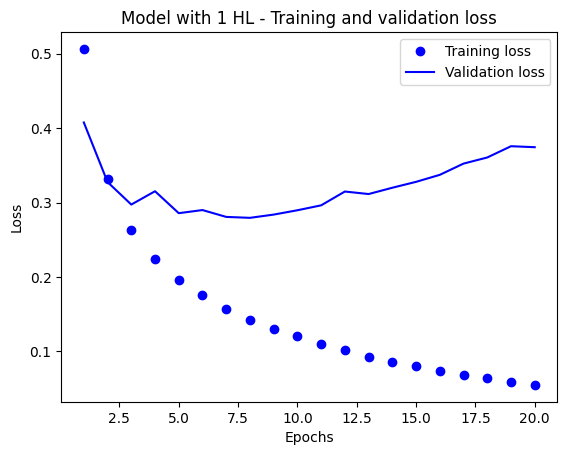

In [ ]:
import matplotlib.pyplot as plt
Model_1_Hidden_Layer_dict = Model_1_Hidden_Layer.history
loss_values_1 = Model_1_Hidden_Layer_dict["loss"]
val_loss_values_1 = Model_1_Hidden_Layer_dict["val_loss"]
epochs = range(1, len(loss_values_1) + 1)
plt.plot(epochs, loss_values_1, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_1, "b", label="Validation loss")
plt.title("Model with 1 HL - Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting Accuracy

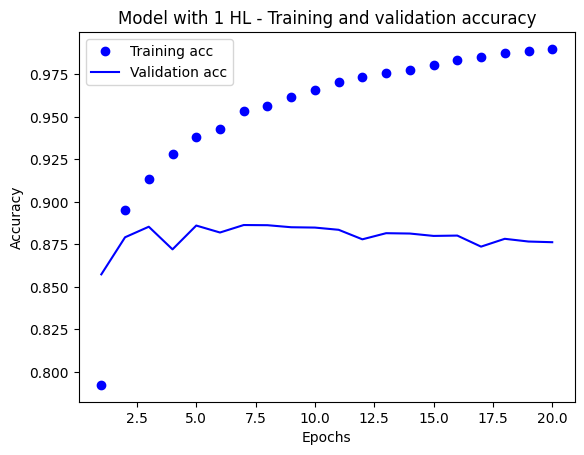

In [ ]:
plt.clf()
acc_1 = Model_1_Hidden_Layer_dict["accuracy"]
val_acc_1 = Model_1_Hidden_Layer_dict["val_accuracy"]
plt.plot(epochs, acc_1, "bo", label="Training acc")
plt.plot(epochs, val_acc_1, "b", label="Validation acc")
plt.title("Model with 1 HL - Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining

In [ ]:
model_1_HL = keras.Sequential([
    layers.Dense(16, activation="relu"), # 1 Hidden Layer
    layers.Dense(1, activation="sigmoid")
])
model_1_HL.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_1_HL.fit(x_train, y_train, epochs=4, batch_size=512)
Model_1_Hidden_Layer_Results = model_1_HL.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7511 - loss: 0.5470
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8972 - loss: 0.3076
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9164 - loss: 0.2411
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9276 - loss: 0.2111
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8820 - loss: 0.2882


In [ ]:
Model_1_Hidden_Layer_Results

[0.2891532778739929, 0.8822000026702881]

Using Trained data to predict

In [ ]:
model_1_HL.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.21235158],
       [0.999259  ],
       [0.6847338 ],
       ...,
       [0.10059176],
       [0.09167492],
       [0.3551244 ]], dtype=float32)

### 2. Model With 3 Hidden Layer

In [ ]:
Model_3_Hidden_Layer = model_3_HL.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.6750 - loss: 0.6091 - val_accuracy: 0.8727 - val_loss: 0.3798
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.8946 - loss: 0.3254 - val_accuracy: 0.8691 - val_loss: 0.3254
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9244 - loss: 0.2301 - val_accuracy: 0.8886 - val_loss: 0.2784
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9449 - loss: 0.1734 - val_accuracy: 0.8874 - val_loss: 0.2830
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9540 - loss: 0.1428 - val_accuracy: 0.8867 - val_loss: 0.2902
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9625 - loss: 0.1196 - val_accuracy: 0.8761 - val_loss: 0.3229
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9644 - loss: 0.1061 - val_accuracy: 0.8841 - val_loss: 0.3269
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9771 - loss: 0.0791 - val_accuracy: 0.8737 - v

In [ ]:
Model_3_Hidden_Layer_dict = Model_3_Hidden_Layer.history
Model_3_Hidden_Layer_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Plotting the graphshowing training and validation loss

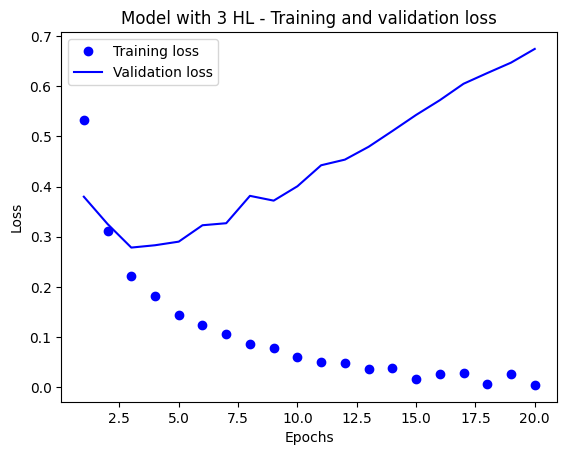

In [ ]:
import matplotlib.pyplot as plt
Model_3_Hidden_Layer_dict = Model_3_Hidden_Layer.history
loss_values_3 = Model_3_Hidden_Layer_dict["loss"]
val_loss_values_3 = Model_3_Hidden_Layer_dict["val_loss"]
epochs = range(1, len(loss_values_3) + 1)
plt.plot(epochs, loss_values_3, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_3, "b", label="Validation loss")
plt.title("Model with 3 HL - Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting Accuracy

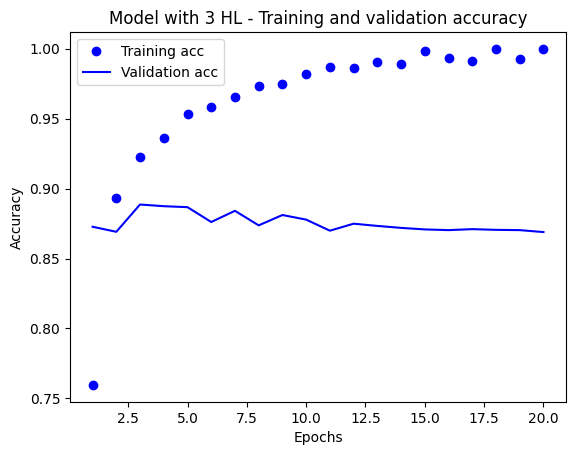

In [ ]:
plt.clf()
acc_3 = Model_3_Hidden_Layer_dict["accuracy"]
val_acc_3 = Model_3_Hidden_Layer_dict["val_accuracy"]
plt.plot(epochs, acc_3, "bo", label="Training acc")
plt.plot(epochs, val_acc_3, "b", label="Validation acc")
plt.title("Model with 3 HL - Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining

In [ ]:
model_3_HL = keras.Sequential([
    layers.Dense(16, activation="relu"), # 1 Hidden Layer
    layers.Dense(16, activation="relu"), # 2 Hidden Layer
    layers.Dense(16, activation="relu"), # 3 Hidden Layer
    layers.Dense(1, activation="sigmoid")
])
model_3_HL.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_3_HL.fit(x_train, y_train, epochs=6, batch_size=512) # Epochs selected 6 because it starts to dip from 7
Model_3_Hidden_Layer_Results = model_3_HL.evaluate(x_test, y_test)

Epoch 1/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.6931 - loss: 0.5873
Epoch 2/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9028 - loss: 0.2814
Epoch 3/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9274 - loss: 0.2015
Epoch 4/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9420 - loss: 0.1661
Epoch 5/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9539 - loss: 0.1394
Epoch 6/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9576 - loss: 0.1277
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8747 - loss: 0.3424


In [ ]:
Model_3_Hidden_Layer_Results

[0.3408409357070923, 0.8765199780464172]

Using Trained data to predict

In [ ]:
model_3_HL.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.09414761],
       [0.99957156],
       [0.8042901 ],
       ...,
       [0.08851308],
       [0.02438793],
       [0.7443855 ]], dtype=float32)

### 3. Model With 32 Hidden Units

In [ ]:
Model_32_Hidden_Units = model_32_HU.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.6825 - loss: 0.5921 - val_accuracy: 0.8046 - val_loss: 0.4342
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.8851 - loss: 0.3239 - val_accuracy: 0.8877 - val_loss: 0.2958
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.9200 - loss: 0.2308 - val_accuracy: 0.8834 - val_loss: 0.2913
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9372 - loss: 0.1846 - val_accuracy: 0.8794 - val_loss: 0.2971
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9524 - loss: 0.1470 - val_accuracy: 0.8810 - val_loss: 0.2960
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9634 - loss: 0.1185 - val_accuracy: 0.8450 - val_loss: 0.4265
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9645 - loss: 0.1092 - val_accuracy: 0.8837 - val_loss: 0.3112
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.9773 - loss: 0.0828 - val_accuracy: 0.8823 - v

In [ ]:
Model_32_Hidden_Units_dict = Model_32_Hidden_Units.history
Model_32_Hidden_Units_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Plotting the graphshowing training and validation loss

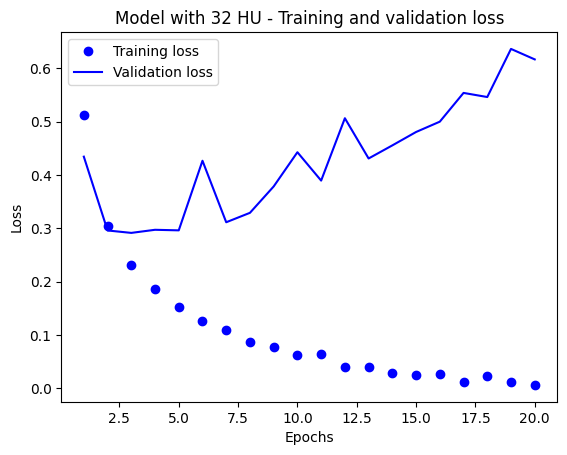

In [ ]:
import matplotlib.pyplot as plt
Model_32_Hidden_Units_dict = Model_32_Hidden_Units.history
loss_values_32 = Model_32_Hidden_Units_dict["loss"]
val_loss_values_32 = Model_32_Hidden_Units_dict["val_loss"]
epochs = range(1, len(loss_values_32) + 1)
plt.plot(epochs, loss_values_32, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_32, "b", label="Validation loss")
plt.title("Model with 32 HU - Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting Accuracy

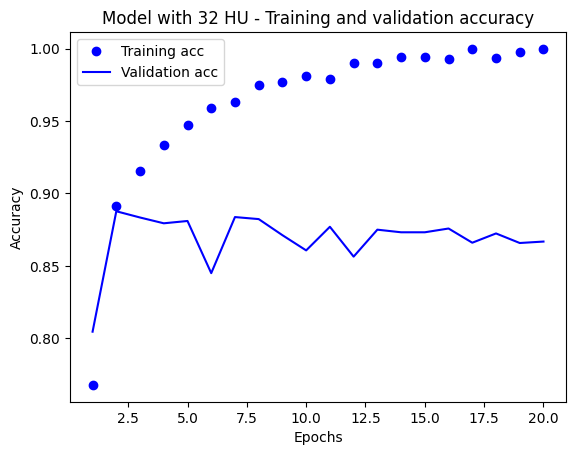

In [ ]:
plt.clf()
acc_32 = Model_32_Hidden_Units_dict["accuracy"]
val_acc_32 = Model_32_Hidden_Units_dict["val_accuracy"]
plt.plot(epochs, acc_32, "bo", label="Training acc")
plt.plot(epochs, val_acc_32, "b", label="Validation acc")
plt.title("Model with 32 HU - Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining

In [ ]:
model_32_HU = keras.Sequential([
    layers.Dense(32, activation="relu"), # 32 Hidden Units
    layers.Dense(32, activation="relu"), # 32 Hidden Units
    layers.Dense(1, activation="sigmoid")
])
model_32_HU.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_32_HU.fit(x_train, y_train, epochs=3, batch_size=512) # Epochs selected 3 because it starts to dip from 3
Model_32_Hidden_Units_Results = model_32_HU.evaluate(x_test, y_test)

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.7290 - loss: 0.5515
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9003 - loss: 0.2751
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9229 - loss: 0.2076
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8874 - loss: 0.2792


In [ ]:
Model_32_Hidden_Units_Results

[0.2781667709350586, 0.888759970664978]

Using Trained data to predict

In [ ]:
model_32_HU.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.28948924],
       [0.99983054],
       [0.8771592 ],
       ...,
       [0.10240595],
       [0.06962123],
       [0.5774995 ]], dtype=float32)

### 4. Model With 64 Hidden Units

In [ ]:
Model_64_Hidden_Units = model_64_HU.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.6944 - loss: 0.5893 - val_accuracy: 0.8124 - val_loss: 0.4243
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.8875 - loss: 0.3116 - val_accuracy: 0.8842 - val_loss: 0.2905
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.9265 - loss: 0.2129 - val_accuracy: 0.8179 - val_loss: 0.4542
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.9199 - loss: 0.2034 - val_accuracy: 0.8882 - val_loss: 0.2771
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - accuracy: 0.9542 - loss: 0.1389 - val_accuracy: 0.8633 - val_loss: 0.3735
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.9411 - loss: 0.1504 - val_accuracy: 0.8852 - val_loss: 0.3062
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.9645 - loss: 0.1061 - val_accuracy: 0.8684 - val_loss: 0.4036
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.9693 - loss: 0.0903 - val_accuracy: 0.8641 - 

In [ ]:
Model_64_Hidden_Units_dict = Model_64_Hidden_Units.history
Model_64_Hidden_Units_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Plotting the graphshowing training and validation loss

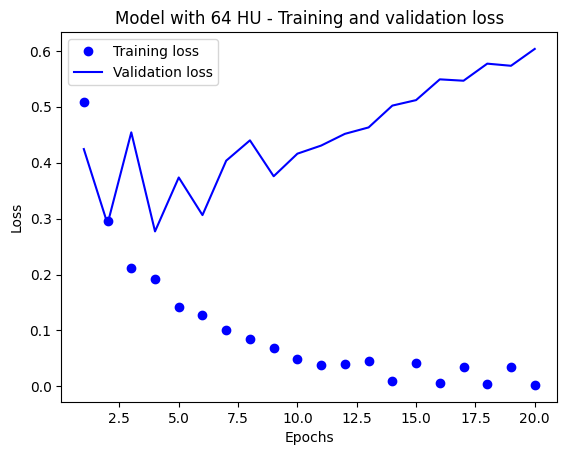

In [ ]:
import matplotlib.pyplot as plt
Model_64_Hidden_Units_dict = Model_64_Hidden_Units.history
loss_values_64 = Model_64_Hidden_Units_dict["loss"]
val_loss_values_64 = Model_64_Hidden_Units_dict["val_loss"]
epochs = range(1, len(loss_values_64) + 1)
plt.plot(epochs, loss_values_64, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_64, "b", label="Validation loss")
plt.title("Model with 64 HU - Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting Accuracy

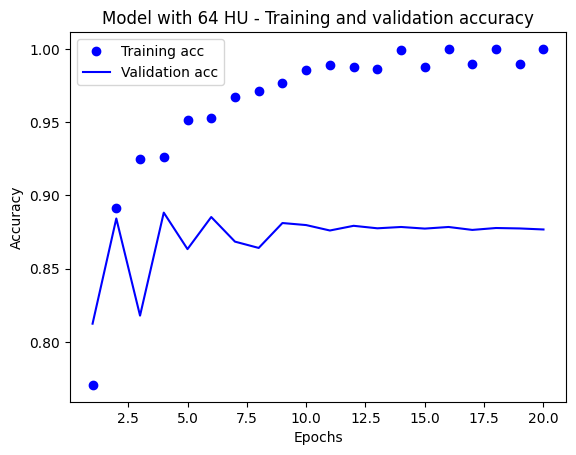

In [ ]:
plt.clf()
acc_64 = Model_64_Hidden_Units_dict["accuracy"]
val_acc_64 = Model_64_Hidden_Units_dict["val_accuracy"]
plt.plot(epochs, acc_64, "bo", label="Training acc")
plt.plot(epochs, val_acc_64, "b", label="Validation acc")
plt.title("Model with 64 HU - Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining

In [ ]:
model_64_HU = keras.Sequential([
    layers.Dense(64, activation="relu"), # 64 Hidden Units
    layers.Dense(64, activation="relu"), # 64 Hidden Units
    layers.Dense(1, activation="sigmoid")
])
model_64_HU.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_64_HU.fit(x_train, y_train, epochs=2, batch_size=512) # Epochs selected 2 because it starts to dip from 2
Model_64_Hidden_Units_Results = model_64_HU.evaluate(x_test, y_test)

Epoch 1/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.7241 - loss: 0.5456
Epoch 2/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.9010 - loss: 0.2670
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8571 - loss: 0.3473


In [ ]:
Model_64_Hidden_Units_Results

[0.3409341275691986, 0.8587599992752075]

Using Trained data to predict

In [ ]:
model_64_HU.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


array([[0.39997244],
       [0.99975413],
       [0.9876823 ],
       ...,
       [0.18779352],
       [0.24800734],
       [0.8131342 ]], dtype=float32)

### 5. Model With MSE Loss

In [ ]:
Model_MSE_LOSS = model_mse.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.6206 - loss: 0.2267 - val_accuracy: 0.8428 - val_loss: 0.1490
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8766 - loss: 0.1282 - val_accuracy: 0.8749 - val_loss: 0.1085
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9127 - loss: 0.0867 - val_accuracy: 0.8792 - val_loss: 0.0957
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9249 - loss: 0.0708 - val_accuracy: 0.8870 - val_loss: 0.0874
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9374 - loss: 0.0577 - val_accuracy: 0.8865 - val_loss: 0.0844
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9506 - loss: 0.0498 - val_accuracy: 0.8867 - val_loss: 0.0835
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9545 - loss: 0.0433 - val_accuracy: 0.8817 - val_loss: 0.0869
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9632 - loss: 0.0365 - val_accuracy: 0.8805 - v

In [ ]:
Model_MSE_LOSS_dict = Model_MSE_LOSS.history
Model_MSE_LOSS_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Plotting the graphshowing training and validation loss

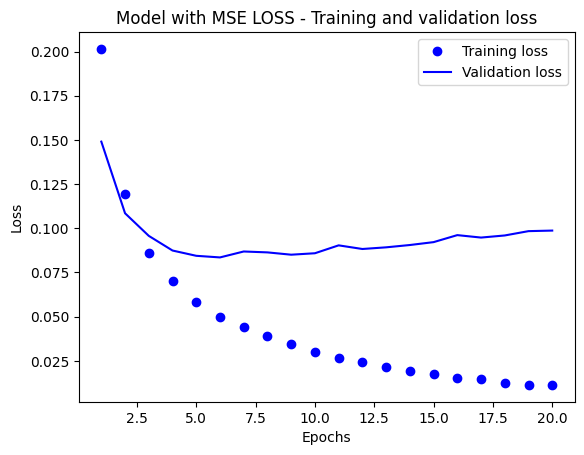

In [ ]:
import matplotlib.pyplot as plt
Model_MSE_LOSS_dict = Model_MSE_LOSS.history
loss_values_MSE = Model_MSE_LOSS_dict["loss"]
val_loss_values_MSE = Model_MSE_LOSS_dict["val_loss"]
epochs = range(1, len(loss_values_MSE) + 1)
plt.plot(epochs, loss_values_MSE, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_MSE, "b", label="Validation loss")
plt.title("Model with MSE LOSS - Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting Accuracy

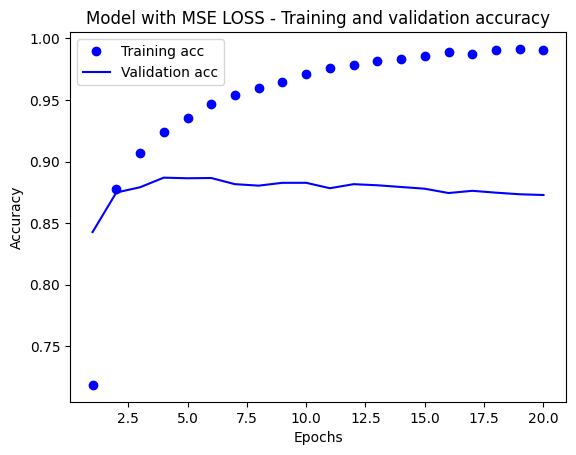

In [ ]:
plt.clf()
acc_MSE = Model_MSE_LOSS_dict["accuracy"]
val_acc_MSE = Model_MSE_LOSS_dict["val_accuracy"]
plt.plot(epochs, acc_MSE, "bo", label="Training acc")
plt.plot(epochs, val_acc_MSE, "b", label="Validation acc")
plt.title("Model with MSE LOSS - Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining

In [ ]:
model_mse = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_mse.compile(optimizer="rmsprop",
              loss="mse", # MSE Loss Function
              metrics=["accuracy"])
model_mse.fit(x_train, y_train, epochs=4, batch_size=512) # Epochs selected 2 because it starts to dip from 2
Model_MSE_LOSS_Results = model_mse.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.7240 - loss: 0.2045
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.8905 - loss: 0.0997
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9142 - loss: 0.0727
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9312 - loss: 0.0597
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8823 - loss: 0.0868


In [ ]:
Model_MSE_LOSS_Results

[0.086273193359375, 0.8833600282669067]

Using Trained data to predict

In [ ]:
model_mse.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.17323162],
       [0.9993285 ],
       [0.8196411 ],
       ...,
       [0.12254603],
       [0.11084169],
       [0.40304676]], dtype=float32)

### 6. Model With tanh activation

In [ ]:
Model_TANH_ACT = model_tanh.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.7070 - loss: 0.5672 - val_accuracy: 0.8417 - val_loss: 0.3885
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8914 - loss: 0.3095 - val_accuracy: 0.8772 - val_loss: 0.3006
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9249 - loss: 0.2159 - val_accuracy: 0.8820 - val_loss: 0.2873
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9433 - loss: 0.1705 - val_accuracy: 0.8857 - val_loss: 0.2795
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9590 - loss: 0.1247 - val_accuracy: 0.8569 - val_loss: 0.3986
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9620 - loss: 0.1117 - val_accuracy: 0.8818 - val_loss: 0.3219
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9778 - loss: 0.0765 - val_accuracy: 0.8720 - val_loss: 0.3690
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9801 - loss: 0.0658 - val_accuracy: 0.8766 - v

In [ ]:
Model_TANH_ACT_dict = Model_TANH_ACT.history
Model_TANH_ACT_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Plotting the graphshowing training and validation loss

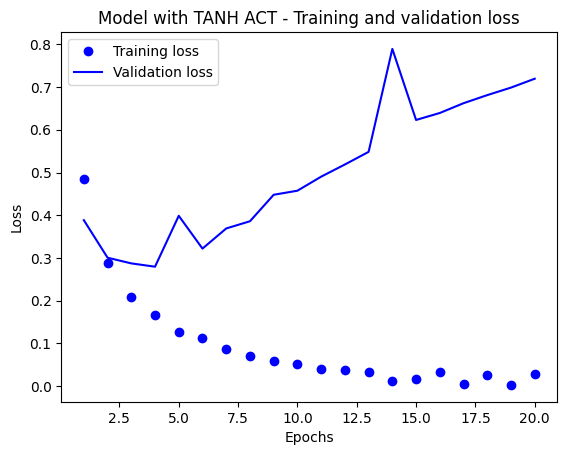

In [ ]:
import matplotlib.pyplot as plt
Model_TANH_ACT_dict = Model_TANH_ACT.history
loss_values_TANH = Model_TANH_ACT_dict["loss"]
val_loss_values_TANH = Model_TANH_ACT_dict["val_loss"]
epochs = range(1, len(loss_values_TANH) + 1)
plt.plot(epochs, loss_values_TANH, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_TANH, "b", label="Validation loss")
plt.title("Model with TANH ACT - Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting Accuracy

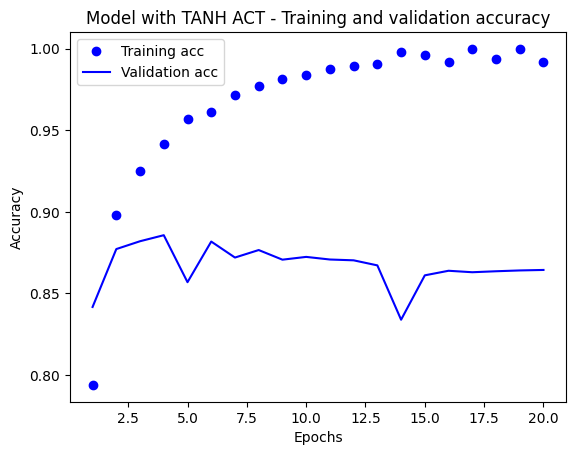

In [ ]:
plt.clf()
acc_TANH = Model_TANH_ACT_dict["accuracy"]
val_acc_TANH = Model_TANH_ACT_dict["val_accuracy"]
plt.plot(epochs, acc_TANH, "bo", label="Training acc")
plt.plot(epochs, val_acc_TANH, "b", label="Validation acc")
plt.title("Model with TANH ACT - Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining

In [ ]:
model_tanh = keras.Sequential([
    layers.Dense(16, activation="tanh"), # tanh activation
    layers.Dense(16, activation="tanh"), # tanh activation
    layers.Dense(1, activation="sigmoid")
])
model_tanh.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_tanh.fit(x_train, y_train, epochs=3, batch_size=512) # Epochs selected 3 because it starts to dip from 3
Model_TANH_ACT_Results = model_tanh.evaluate(x_test, y_test)

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7369 - loss: 0.5302
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9085 - loss: 0.2583
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9310 - loss: 0.1901
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8728 - loss: 0.3160


In [ ]:
Model_TANH_ACT_Results

[0.31786277890205383, 0.872160017490387]

Using Trained data to predict

In [ ]:
model_tanh.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.09332374],
       [0.9956134 ],
       [0.24930619],
       ...,
       [0.04044585],
       [0.03484334],
       [0.5587447 ]], dtype=float32)

### 7. Model With L2 Regularization

In [ ]:
Model_Reg_Tech = model_reg.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.6884 - loss: 0.6590 - val_accuracy: 0.8615 - val_loss: 0.4679
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8834 - loss: 0.4197 - val_accuracy: 0.8478 - val_loss: 0.4141
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9079 - loss: 0.3238 - val_accuracy: 0.8866 - val_loss: 0.3410
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9250 - loss: 0.2757 - val_accuracy: 0.8860 - val_loss: 0.3327
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9358 - loss: 0.2456 - val_accuracy: 0.8865 - val_loss: 0.3303
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9493 - loss: 0.2192 - val_accuracy: 0.8804 - val_loss: 0.3450
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9541 - loss: 0.2055 - val_accuracy: 0.8816 - val_loss: 0.3455
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9580 - loss: 0.1950 - val_accuracy: 0.8828 - v

In [ ]:
Model_Reg_Tech_dict = Model_Reg_Tech.history
Model_Reg_Tech_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Plotting the graphshowing training and validation loss

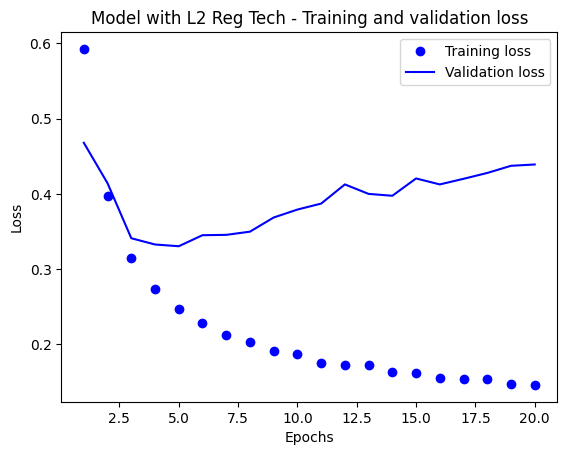

In [ ]:
import matplotlib.pyplot as plt
Model_Reg_Tech_dict = Model_Reg_Tech.history
loss_values_Reg = Model_Reg_Tech_dict["loss"]
val_loss_values_Reg = Model_Reg_Tech_dict["val_loss"]
epochs = range(1, len(loss_values_Reg) + 1)
plt.plot(epochs, loss_values_Reg, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_Reg, "b", label="Validation loss")
plt.title("Model with L2 Reg Tech - Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting Accuracy

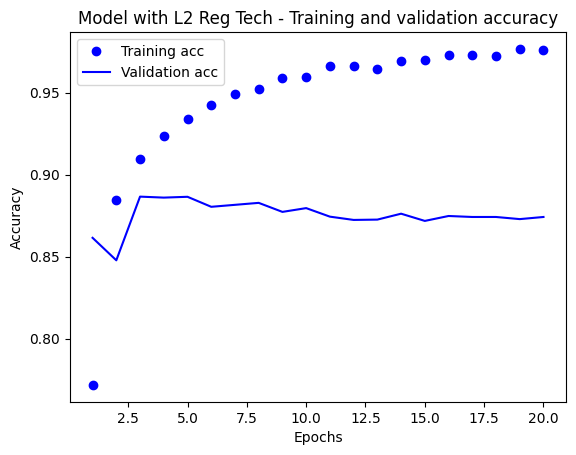

In [ ]:
plt.clf()
acc_Reg = Model_Reg_Tech_dict["accuracy"]
val_acc_Reg = Model_Reg_Tech_dict["val_accuracy"]
plt.plot(epochs, acc_Reg, "bo", label="Training acc")
plt.plot(epochs, val_acc_Reg, "b", label="Validation acc")
plt.title("Model with L2 Reg Tech - Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining

In [ ]:
model_reg = keras.Sequential([
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.001)), # Applied L2 regularization (0.001 - common accepted value)
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.001)), # Applied L2 regularization (0.001 - common accepted value)
    layers.Dense(1, activation="sigmoid")
])
model_reg.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_reg.fit(x_train, y_train, epochs=2, batch_size=512) # Epochs selected 2 because it starts to dip from 3
Model_Reg_Tech_Results = model_reg.evaluate(x_test, y_test)

Epoch 1/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.7198 - loss: 0.6214
Epoch 2/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9010 - loss: 0.3510
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8859 - loss: 0.3442


In [ ]:
Model_Reg_Tech_Results

[0.34400734305381775, 0.8865600228309631]

Using Trained data to predict

In [ ]:
model_reg.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


array([[0.32413855],
       [0.99838555],
       [0.75882363],
       ...,
       [0.1789023 ],
       [0.18363708],
       [0.5152261 ]], dtype=float32)

### 8. Model With Dropout Technique`

In [ ]:
Model_Drp_Tech = model_drp.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.5922 - loss: 0.6562 - val_accuracy: 0.8539 - val_loss: 0.5190
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7580 - loss: 0.5248 - val_accuracy: 0.8697 - val_loss: 0.4152
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8315 - loss: 0.4410 - val_accuracy: 0.8717 - val_loss: 0.3666
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8637 - loss: 0.3843 - val_accuracy: 0.8823 - val_loss: 0.3331
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.8858 - loss: 0.3429 - val_accuracy: 0.8886 - val_loss: 0.2964
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9071 - loss: 0.3043 - val_accuracy: 0.8883 - val_loss: 0.2831
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.9168 - loss: 0.2801 - val_accuracy: 0.8834 - val_loss: 0.3077
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9242 - loss: 0.2467 - val_accuracy: 0.8884 - v

In [ ]:
Model_Drp_Tech_dict = Model_Drp_Tech.history
Model_Drp_Tech_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Plotting the graphshowing training and validation loss

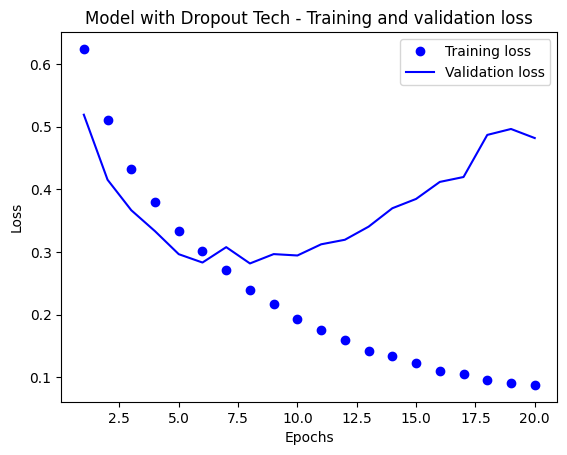

In [ ]:
import matplotlib.pyplot as plt
Model_Drp_Tech_dict = Model_Drp_Tech.history
loss_values_Drp = Model_Drp_Tech_dict["loss"]
val_loss_values_Drp = Model_Drp_Tech_dict["val_loss"]
epochs = range(1, len(loss_values_Drp) + 1)
plt.plot(epochs, loss_values_Drp, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_Drp, "b", label="Validation loss")
plt.title("Model with Dropout Tech - Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting Accuracy

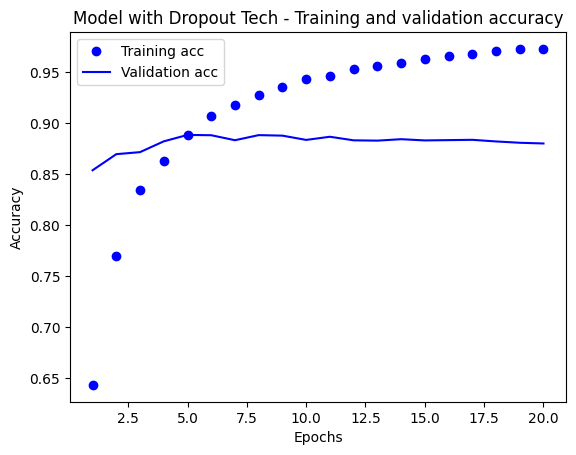

In [ ]:
plt.clf()
acc_Drp = Model_Drp_Tech_dict["accuracy"]
val_acc_Drp = Model_Drp_Tech_dict["val_accuracy"]
plt.plot(epochs, acc_Drp, "bo", label="Training acc")
plt.plot(epochs, val_acc_Drp, "b", label="Validation acc")
plt.title("Model with Dropout Tech - Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining

In [ ]:
model_drp = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_drp.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_drp.fit(x_train, y_train, epochs=9, batch_size=512) # Epochs selected 9 because it starts to stablize from 9
Model_Drp_Tech_Results = model_drp.evaluate(x_test, y_test)

Epoch 1/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.6007 - loss: 0.6538
Epoch 2/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.7926 - loss: 0.5020
Epoch 3/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.8597 - loss: 0.3998
Epoch 4/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8935 - loss: 0.3324
Epoch 5/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9057 - loss: 0.2805
Epoch 6/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9225 - loss: 0.2462
Epoch 7/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9269 - loss: 0.2200
Epoch 8/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9380 - loss: 0.1955
Epoch 9/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9398 - loss: 0.1834
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8779 - loss: 0.3546


In [ ]:
Model_Drp_Tech_Results

[0.34334075450897217, 0.8809599876403809]

Using Trained data to predict

In [ ]:
model_drp.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.11506828],
       [1.        ],
       [0.99996316],
       ...,
       [0.10267788],
       [0.08504791],
       [0.81308633]], dtype=float32)

### Comparison of the Models

Retrieveing the training history for all models (For Organising)

In [ ]:
Base_model_dict = Base_model.history
Base_model_dict.keys()

Model_1_Hidden_Layer_dict = Model_1_Hidden_Layer.history
Model_1_Hidden_Layer_dict.keys()

Model_3_Hidden_Layer_dict = Model_3_Hidden_Layer.history
Model_3_Hidden_Layer_dict.keys()

Model_32_Hidden_Units_dict = Model_32_Hidden_Units.history
Model_32_Hidden_Units_dict.keys()

Model_64_Hidden_Units_dict = Model_64_Hidden_Units.history
Model_64_Hidden_Units_dict.keys()

Model_MSE_LOSS_dict = Model_MSE_LOSS.history
Model_MSE_LOSS_dict.keys()

Model_TANH_ACT_dict = Model_TANH_ACT.history
Model_TANH_ACT_dict.keys()

Model_Reg_Tech_dict = Model_Reg_Tech.history
Model_Reg_Tech_dict.keys()

Model_Drp_Tech_dict = Model_Drp_Tech.history
Model_Drp_Tech_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Question 1 - Comparing Hidden layers with Base Model


Base_Model history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_1_Hidden_Layer history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_3_Hidden_Layer history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


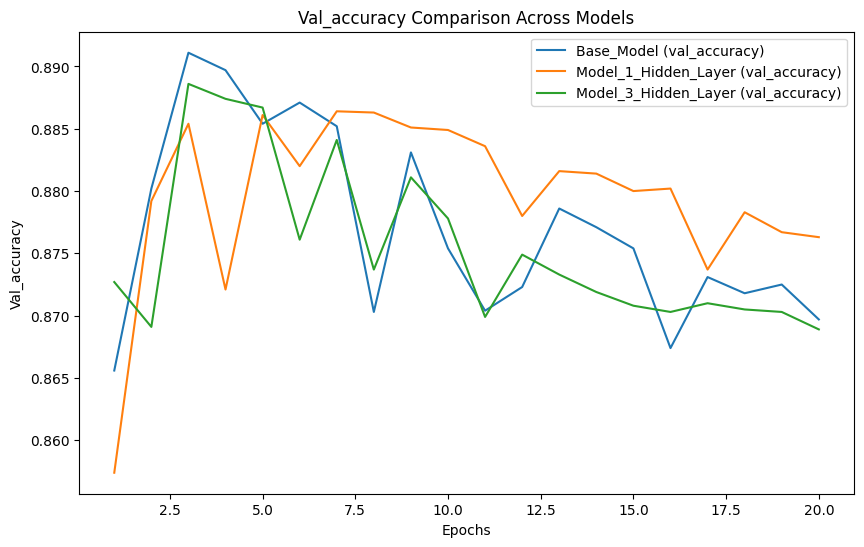

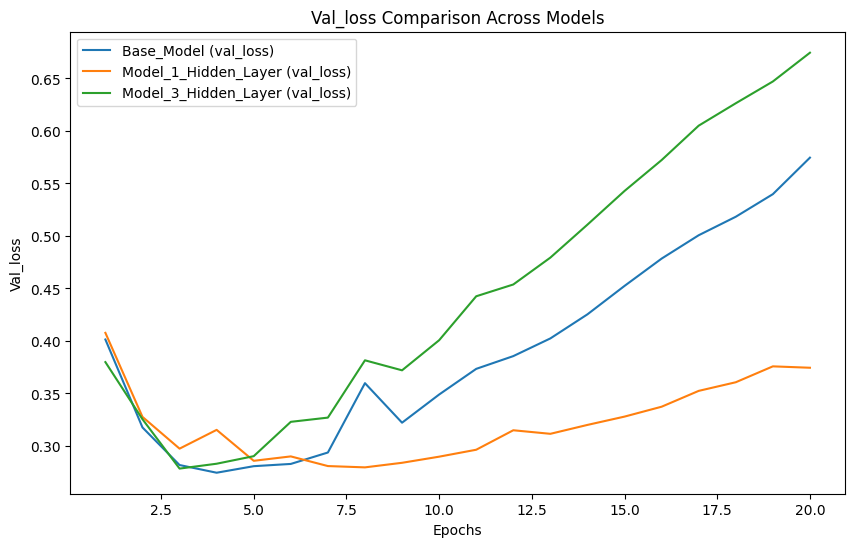

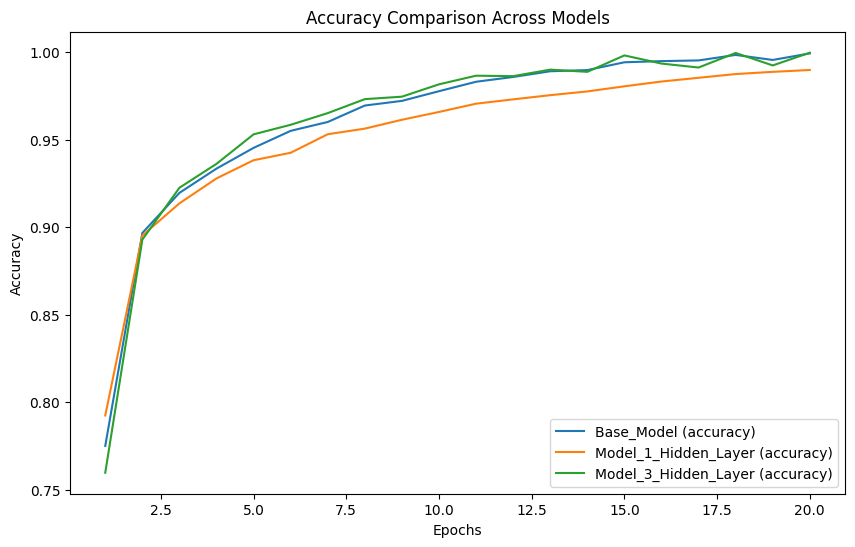

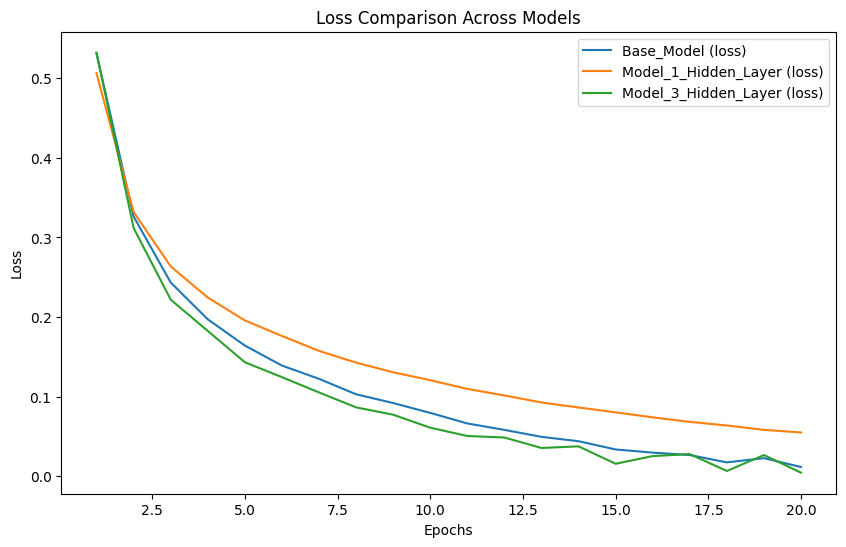

In [ ]:
import matplotlib.pyplot as plt

# Dictionary of models and their histories
model_histories = {
    "Base_Model": Base_model,
    "Model_1_Hidden_Layer": Model_1_Hidden_Layer,
    "Model_3_Hidden_Layer": Model_3_Hidden_Layer,
}

# Extract and display keys of histories
for model_name, model in model_histories.items():
    history_dict = model.history
    print(f"{model_name} history keys: {history_dict.keys()}")

# Function to plot training and validation accuracy/loss across models
def plot_metrics(metric):
    plt.figure(figsize=(10, 6))
    for model_name, model in model_histories.items():
        metric_values = model.history[metric]
        plt.plot(range(1, len(metric_values) + 1), metric_values, label=f"{model_name} ({metric})")

    plt.title(f'{metric.capitalize()} Comparison Across Models')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

# Plot validation accuracy
plot_metrics('val_accuracy')

# Plot validation loss
plot_metrics('val_loss')

plot_metrics('accuracy')

plot_metrics('loss')

Question 2 - Comparing Base model with Hidden Units value of 16, 32 and 64

Base_Model history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_32_Hidden_Units history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_64_Hidden_Units history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


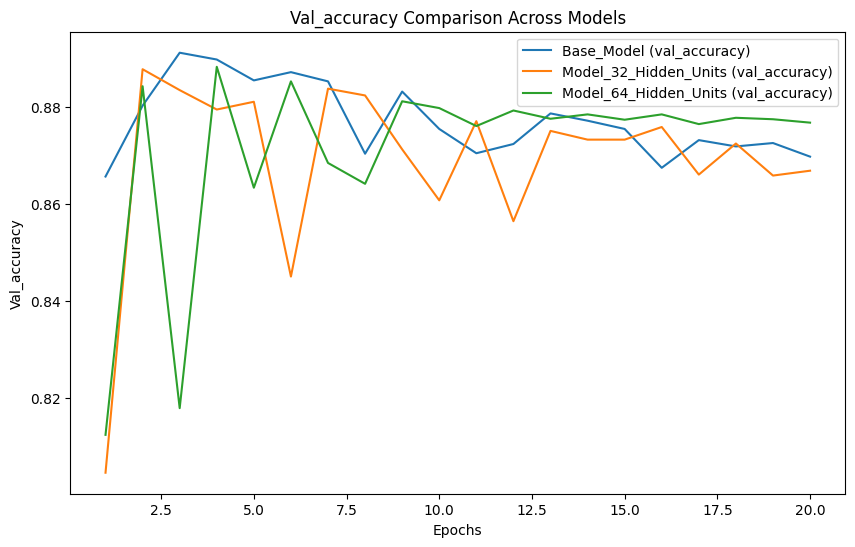

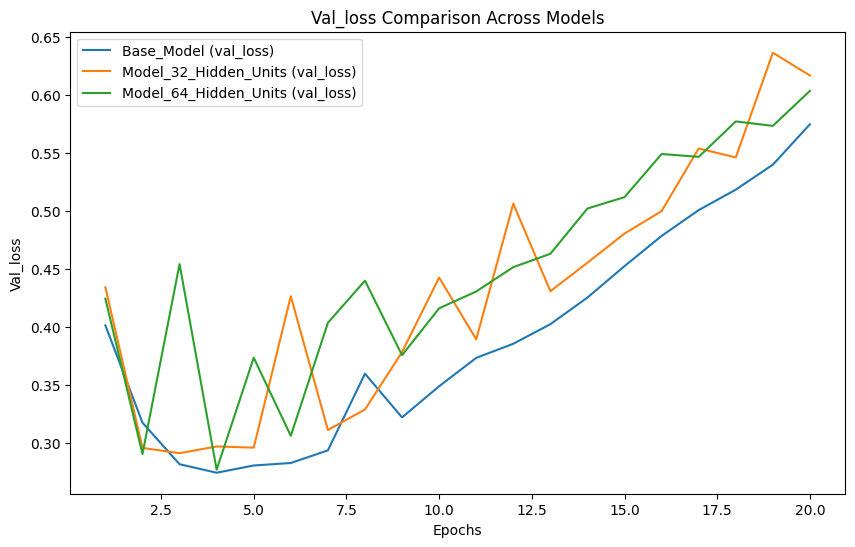

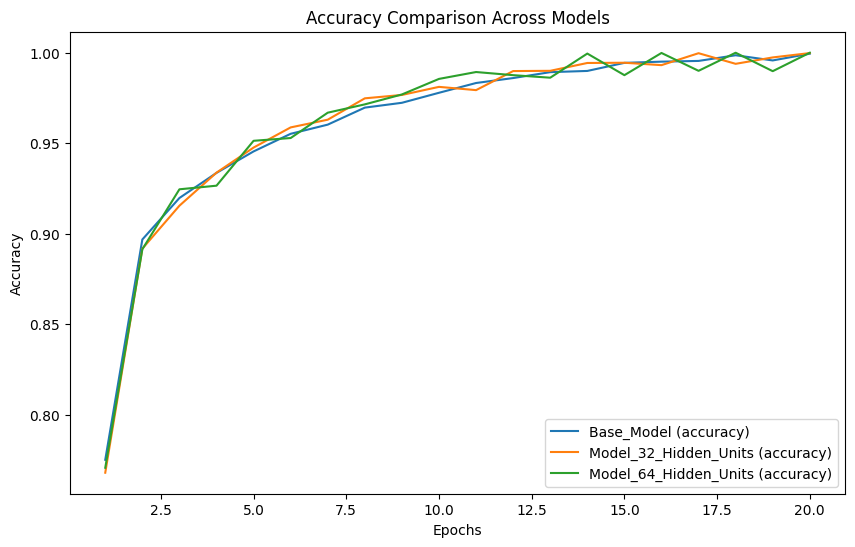

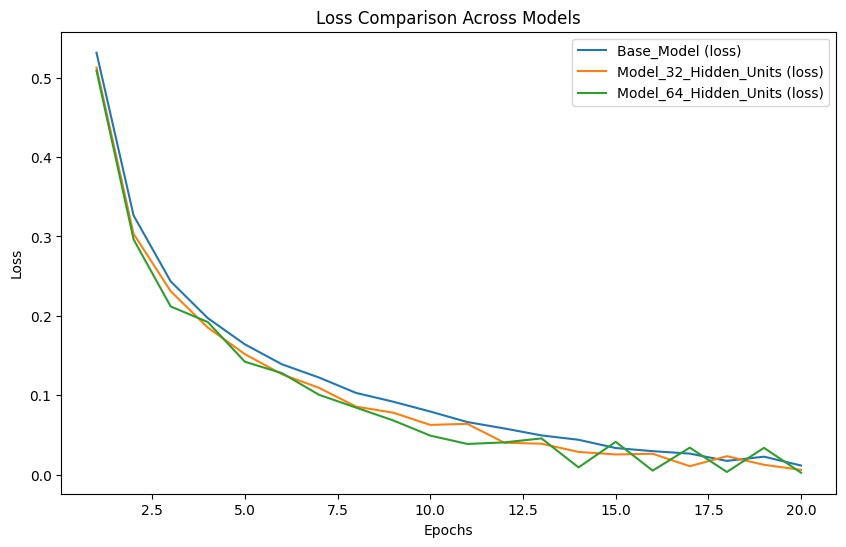

In [ ]:
import matplotlib.pyplot as plt

# Dictionary of models and their histories
model_histories = {
    "Base_Model": Base_model,
    "Model_32_Hidden_Units": Model_32_Hidden_Units,
    "Model_64_Hidden_Units": Model_64_Hidden_Units,
}

# Extract and display keys of histories
for model_name, model in model_histories.items():
    history_dict = model.history
    print(f"{model_name} history keys: {history_dict.keys()}")

# Function to plot training and validation accuracy/loss across models
def plot_metrics(metric):
    plt.figure(figsize=(10, 6))
    for model_name, model in model_histories.items():
        metric_values = model.history[metric]
        plt.plot(range(1, len(metric_values) + 1), metric_values, label=f"{model_name} ({metric})")

    plt.title(f'{metric.capitalize()} Comparison Across Models')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

# Plot validation accuracy
plot_metrics('val_accuracy')

# Plot validation loss
plot_metrics('val_loss')

plot_metrics('accuracy')

plot_metrics('loss')

Question 3 - Comparing of MSE loss function

Base_Model history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_MSE_Loss history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


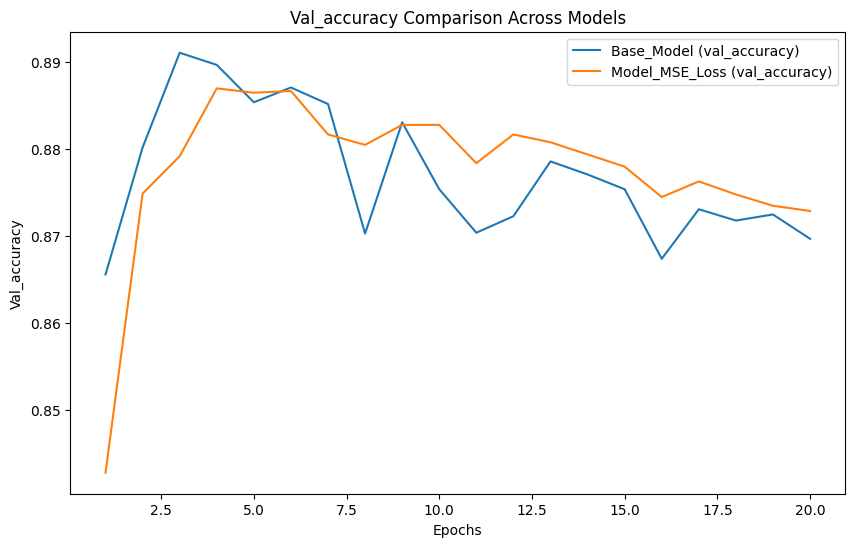

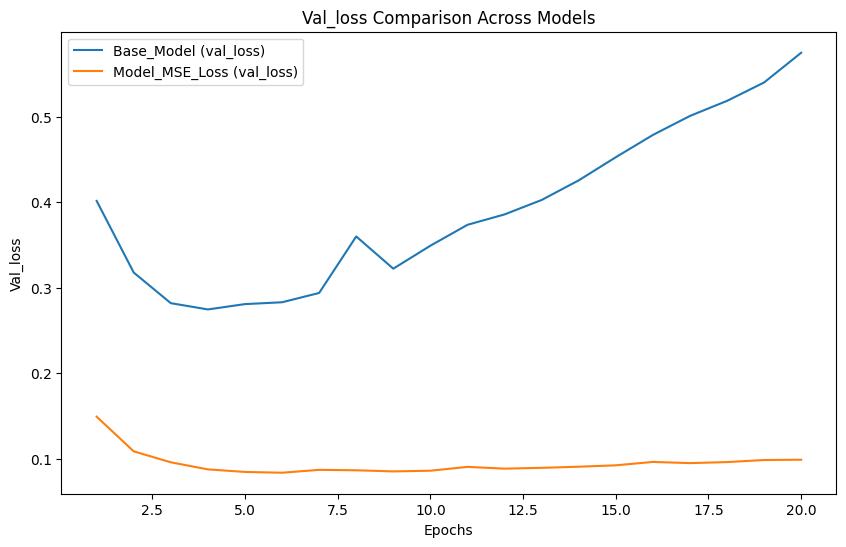

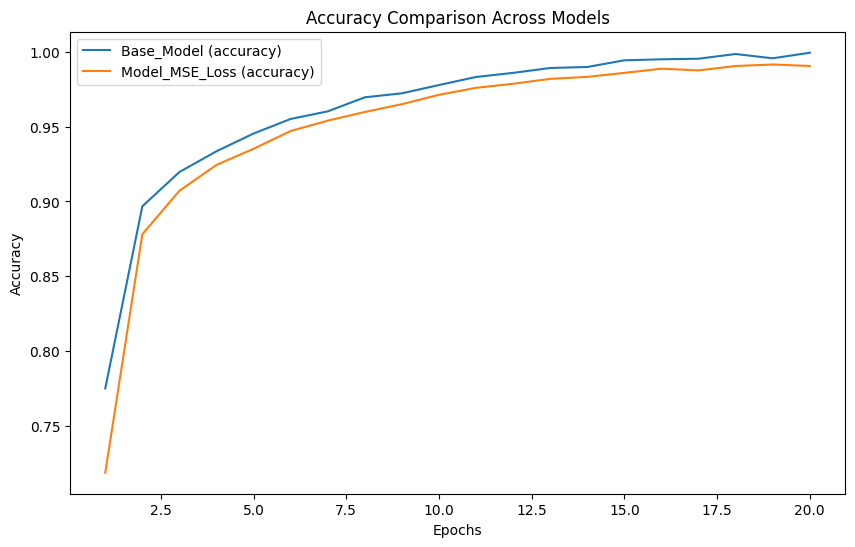

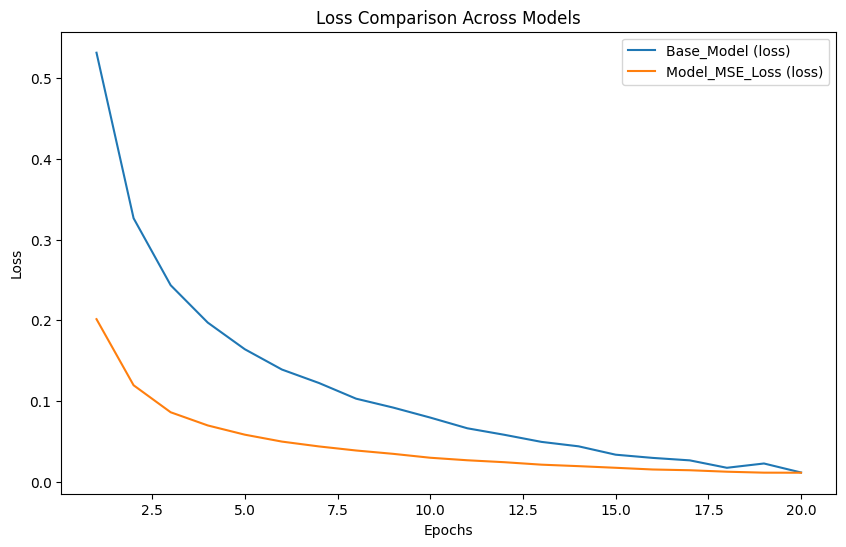

In [ ]:
import matplotlib.pyplot as plt

# Dictionary of models and their histories
model_histories = {
    "Base_Model": Base_model,
    "Model_MSE_Loss": Model_MSE_LOSS,
 }

# Extract and display keys of histories
for model_name, model in model_histories.items():
    history_dict = model.history
    print(f"{model_name} history keys: {history_dict.keys()}")

# Function to plot training and validation accuracy/loss across models
def plot_metrics(metric):
    plt.figure(figsize=(10, 6))
    for model_name, model in model_histories.items():
        metric_values = model.history[metric]
        plt.plot(range(1, len(metric_values) + 1), metric_values, label=f"{model_name} ({metric})")

    plt.title(f'{metric.capitalize()} Comparison Across Models')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

# Plot validation accuracy
plot_metrics('val_accuracy')

# Plot validation loss
plot_metrics('val_loss')

plot_metrics('accuracy')

plot_metrics('loss')

Question 4 - Comparing of Tanh activation with base model

Base_Model history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_TANH_Activation history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


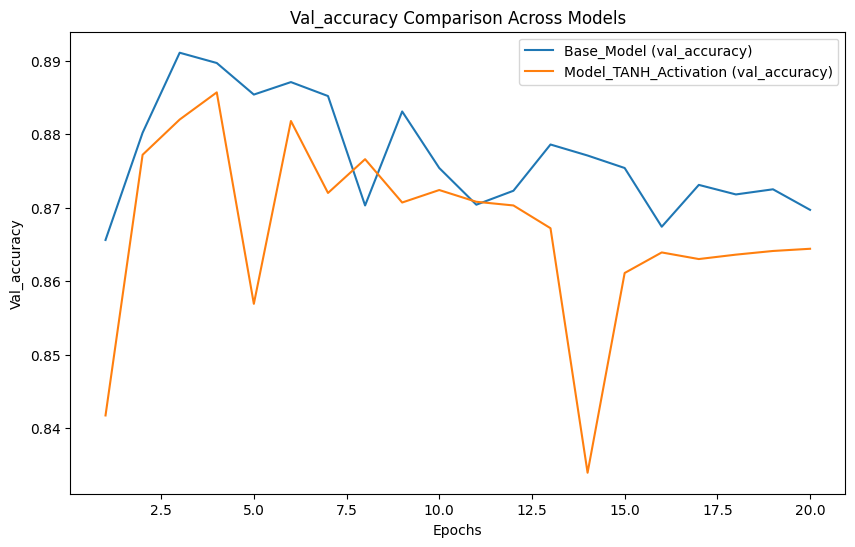

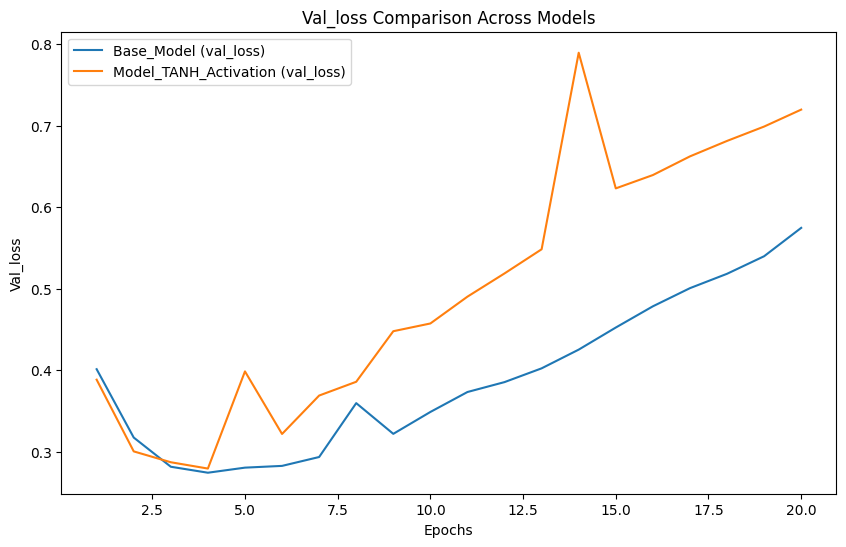

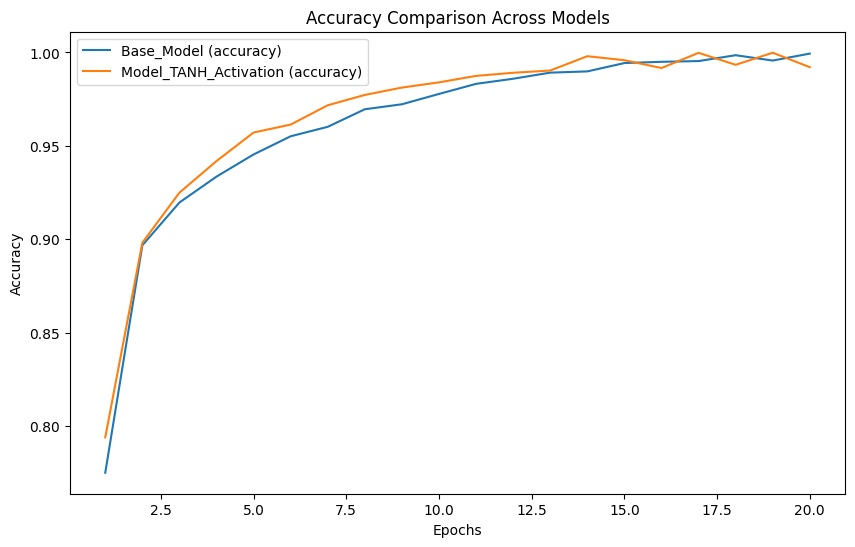

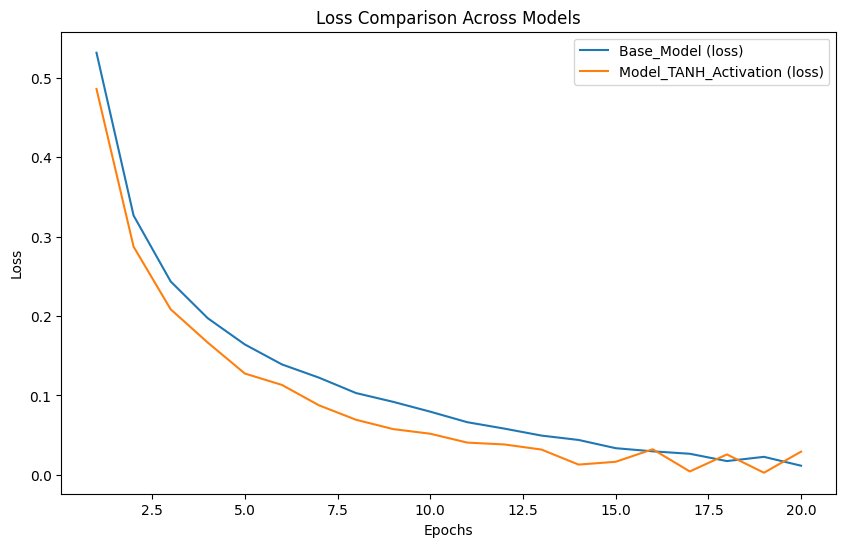

In [ ]:
import matplotlib.pyplot as plt

# Dictionary of models and their histories
model_histories = {
    "Base_Model": Base_model,
    "Model_TANH_Activation": Model_TANH_ACT,
}

# Extract and display keys of histories
for model_name, model in model_histories.items():
    history_dict = model.history
    print(f"{model_name} history keys: {history_dict.keys()}")

# Function to plot training and validation accuracy/loss across models
def plot_metrics(metric):
    plt.figure(figsize=(10, 6))
    for model_name, model in model_histories.items():
        metric_values = model.history[metric]
        plt.plot(range(1, len(metric_values) + 1), metric_values, label=f"{model_name} ({metric})")

    plt.title(f'{metric.capitalize()} Comparison Across Models')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

# Plot validation accuracy
plot_metrics('val_accuracy')

# Plot validation loss
plot_metrics('val_loss')

plot_metrics('accuracy')

plot_metrics('loss')

Question 5 - Comparison of L2 regularization, Dropout and Base model

Base_Model history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_Regularization history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_Dropout history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


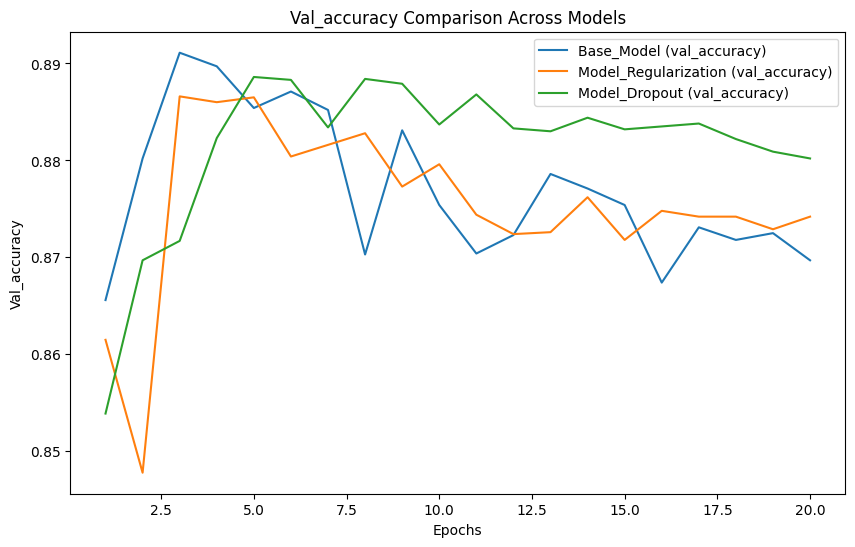

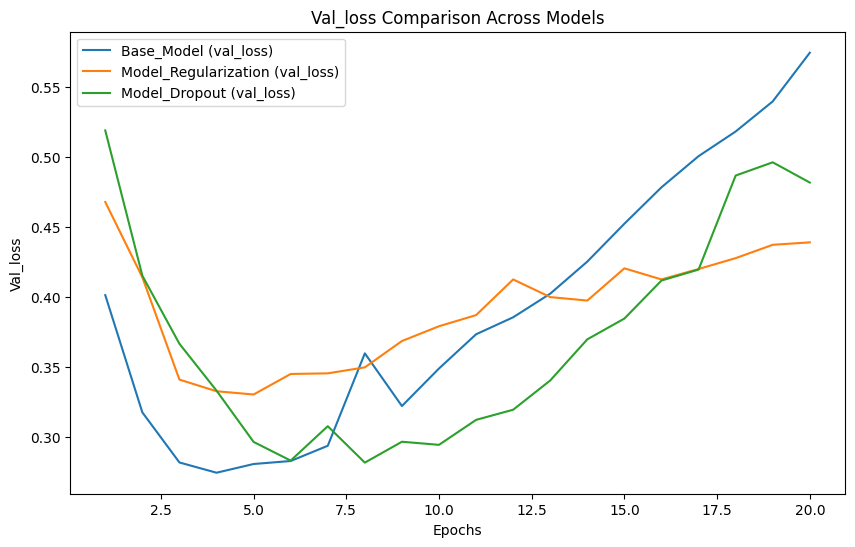

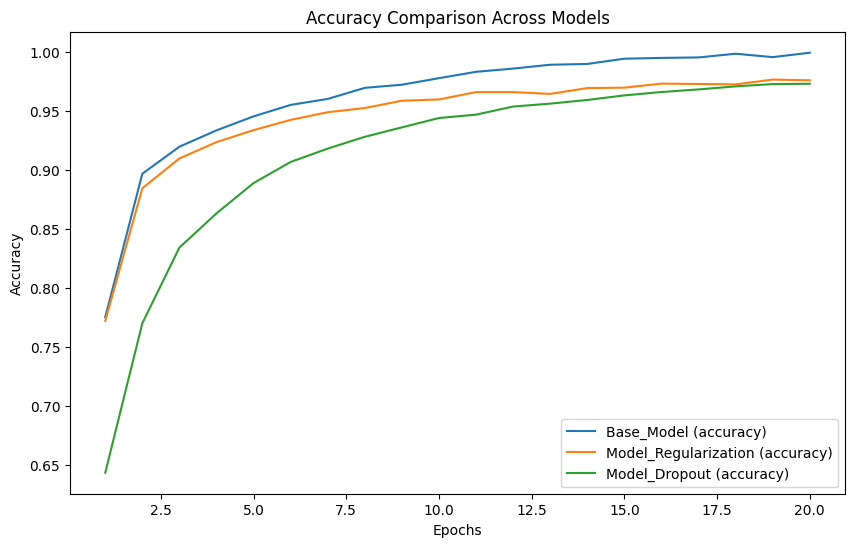

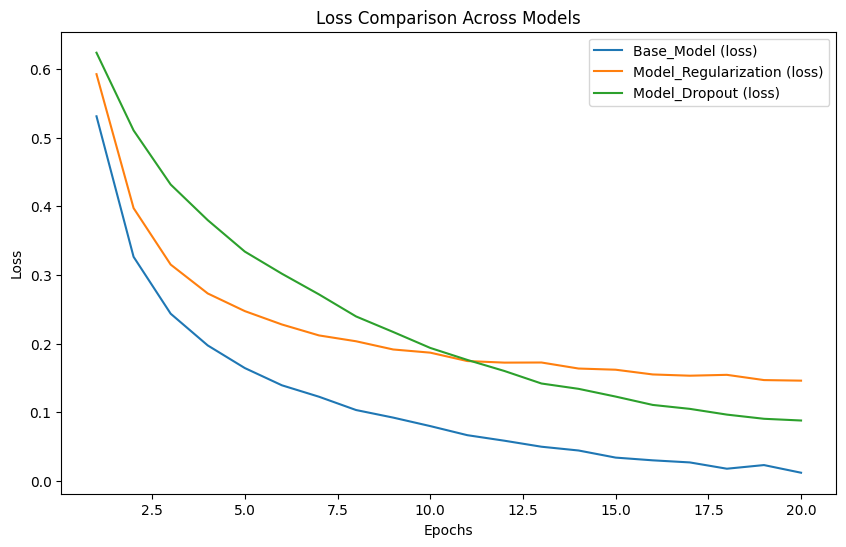

In [ ]:
import matplotlib.pyplot as plt

# Dictionary of models and their histories
model_histories = {
    "Base_Model": Base_model,
    "Model_Regularization": Model_Reg_Tech,
    "Model_Dropout": Model_Drp_Tech
}

# Extract and display keys of histories
for model_name, model in model_histories.items():
    history_dict = model.history
    print(f"{model_name} history keys: {history_dict.keys()}")

# Function to plot training and validation accuracy/loss across models
def plot_metrics(metric):
    plt.figure(figsize=(10, 6))
    for model_name, model in model_histories.items():
        metric_values = model.history[metric]
        plt.plot(range(1, len(metric_values) + 1), metric_values, label=f"{model_name} ({metric})")

    plt.title(f'{metric.capitalize()} Comparison Across Models')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

# Plot validation accuracy
plot_metrics('val_accuracy')

# Plot validation loss
plot_metrics('val_loss')

plot_metrics('accuracy')

plot_metrics('loss')

Comparing all the models

Base_Model history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_1_Hidden_Layer history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_3_Hidden_Layer history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_32_Hidden_Units history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_64_Hidden_Units history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_MSE_Loss history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_TANH_Activation history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_Regularization history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_Dropout history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


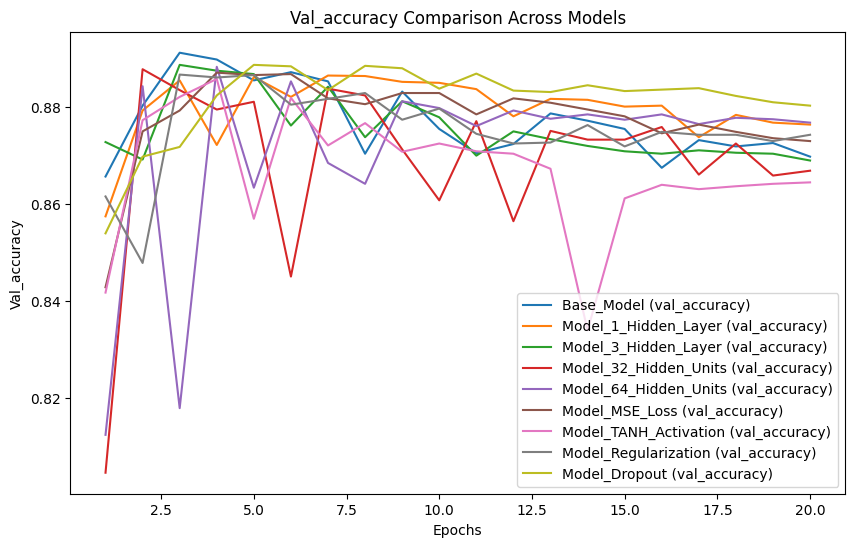

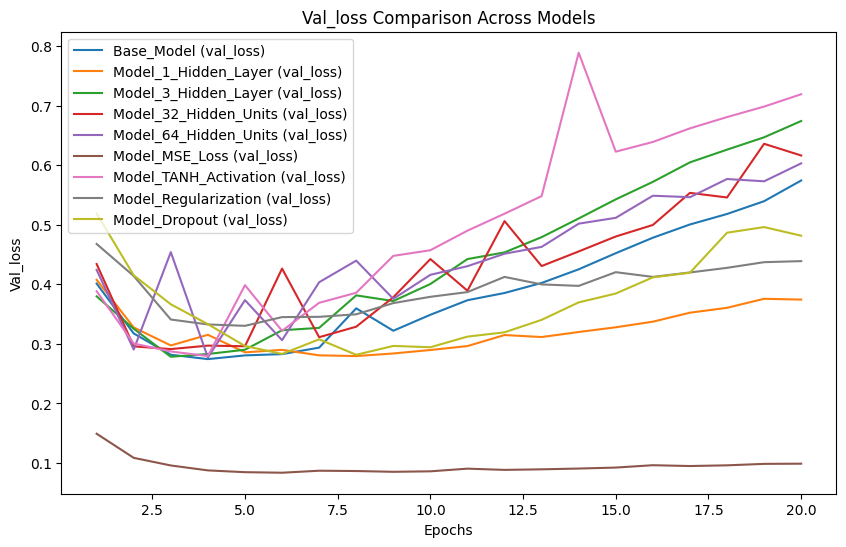

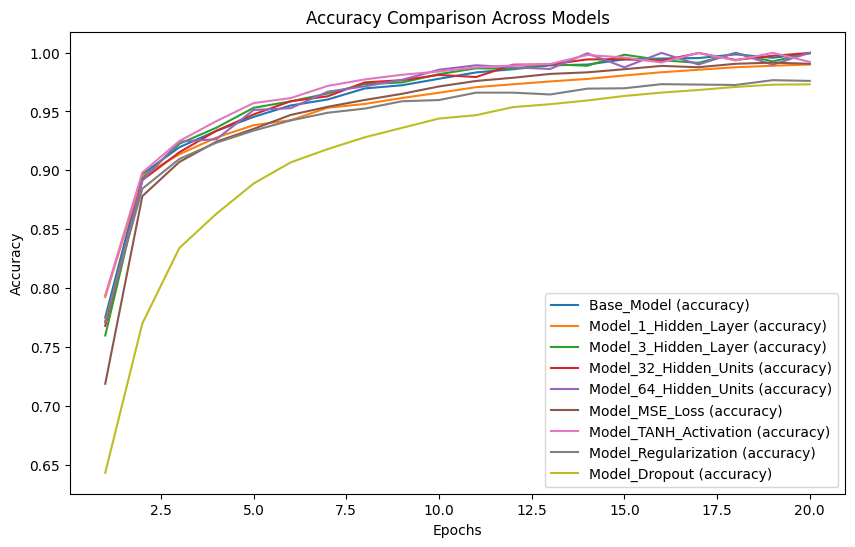

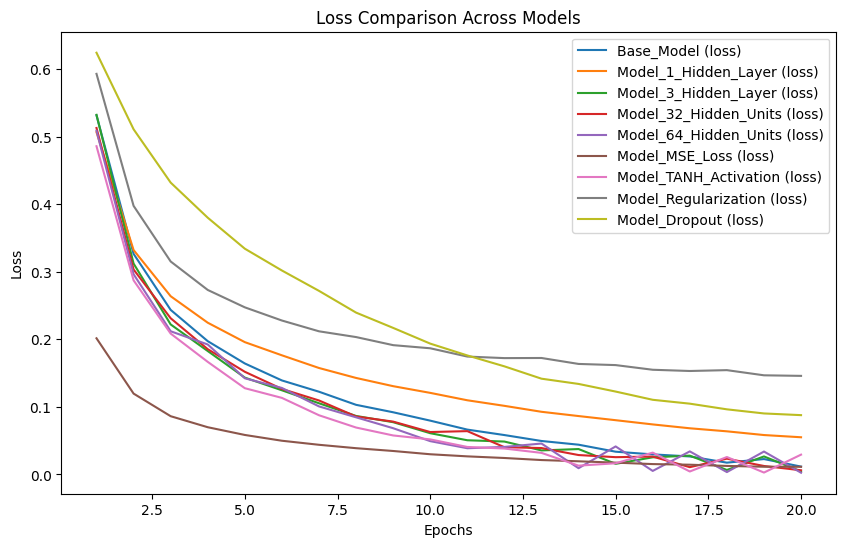

In [ ]:
import matplotlib.pyplot as plt

# Dictionary of models and their histories
model_histories = {
    "Base_Model": Base_model,
    "Model_1_Hidden_Layer": Model_1_Hidden_Layer,
    "Model_3_Hidden_Layer": Model_3_Hidden_Layer,
    "Model_32_Hidden_Units": Model_32_Hidden_Units,
    "Model_64_Hidden_Units": Model_64_Hidden_Units,
    "Model_MSE_Loss": Model_MSE_LOSS,
    "Model_TANH_Activation": Model_TANH_ACT,
    "Model_Regularization": Model_Reg_Tech,
    "Model_Dropout": Model_Drp_Tech
}

# Extract and display keys of histories
for model_name, model in model_histories.items():
    history_dict = model.history
    print(f"{model_name} history keys: {history_dict.keys()}")

# Function to plot training and validation accuracy/loss across models
def plot_metrics(metric):
    plt.figure(figsize=(10, 6))
    for model_name, model in model_histories.items():
        metric_values = model.history[metric]
        plt.plot(range(1, len(metric_values) + 1), metric_values, label=f"{model_name} ({metric})")

    plt.title(f'{metric.capitalize()} Comparison Across Models')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

# Plot validation accuracy
plot_metrics('val_accuracy')

# Plot validation loss
plot_metrics('val_loss')

plot_metrics('accuracy')

plot_metrics('loss')


| Model    | Test Loss | Test Accuracy |
|----------|-----------|---------------|
| Base Model | 0.28      | 0.89          |
| 1HL      | 0.28      | 0.89          |
| 3HL      | 0.37      | 0.87          |
| 32HU     | 0.29      | 0.88          |
| 64HU     | 0.29      | 0.88          |
| MSE      | 0.09      | 0.88          |
| Tanh     | 0.28      | 0.88          |
| L2       | 0.34      | 0.88          |
| Dropout  | 0.32      | 0.88          |